In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [5]:
df = pd.read_csv('기상데이터/개정 날씨데이터/동대문구_포트홀_날씨.csv')
df

,Date,강수량,강설량,최고기온,최저기온,습도,강수형태,강수확률,발생건수,파손면적합계,일교차
0,2019-01-01,0.0,0.0,0.0,-6.0,40.0,0.0,0.0,2.0,0.18,6.0
1,2019-01-02,0.0,0.0,2.0,-4.0,25.0,0.0,0.0,83.0,19.61,6.0
2,2019-01-03,0.0,0.0,4.0,-5.0,25.0,0.0,0.0,100.0,22.03,9.0
3,2019-01-04,0.0,0.0,1.0,-6.0,60.0,0.0,20.0,62.0,21.46,7.0
4,2019-01-05,0.0,0.0,2.0,-5.0,25.0,0.0,10.0,0.0,0.00,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1242,2022-05-27,0.0,0.0,29.0,15.0,50.0,0.0,0.0,23.0,19.44,14.0
1243,2022-05-28,0.0,0.0,29.0,17.0,45.0,0.0,0.0,17.0,4.32,12.0
1244,2022-05-29,0.0,0.0,24.0,17.0,45.0,0.0,0.0,18.0,6.95,7.0
1245,2022-05-30,0.0,0.0,26.0,16.0,75.0,0.0,30.0,30.0,47.49,10.0


In [7]:
df.index = df['Date']
df.drop('Date', axis=1,inplace=True)

In [8]:
df

,강수량,강설량,최고기온,최저기온,습도,강수형태,강수확률,발생건수,파손면적합계,일교차
Date,,,,,,,,,,
2019-01-01,0.0,0.0,0.0,-6.0,40.0,0.0,0.0,2.0,0.18,6.0
2019-01-02,0.0,0.0,2.0,-4.0,25.0,0.0,0.0,83.0,19.61,6.0
2019-01-03,0.0,0.0,4.0,-5.0,25.0,0.0,0.0,100.0,22.03,9.0
2019-01-04,0.0,0.0,1.0,-6.0,60.0,0.0,20.0,62.0,21.46,7.0
2019-01-05,0.0,0.0,2.0,-5.0,25.0,0.0,10.0,0.0,0.00,7.0
...,...,...,...,...,...,...,...,...,...,...
2022-05-27,0.0,0.0,29.0,15.0,50.0,0.0,0.0,23.0,19.44,14.0
2022-05-28,0.0,0.0,29.0,17.0,45.0,0.0,0.0,17.0,4.32,12.0
2022-05-29,0.0,0.0,24.0,17.0,45.0,0.0,0.0,18.0,6.95,7.0


## 포트홀 일별, 데이터 파악

In [3]:
# 평가용 함수 미리 정의
def eval_score(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    
    print('MSE : ',np.round(mse,3))
    print('RMSE : ',np.round(rmse,3))
    print('R2 : ',np.round(r2,3))

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
def porthall(gu):
    
    city = pd.read_csv('기상데이터/개정 날씨데이터/{}_포트홀_날씨.csv'.format(gu))
    city.index = city['Date']
    city.drop('Date', axis=1,inplace=True)
    
    # 다중선형회귀 시작
    X = city.drop(['발생건수'],axis=1)
    y = city['발생건수']
    
    # 훈련, 검증 셋으로 분할
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lr=LinearRegression() # 선형회귀모델 가져오기
    # 적합
    lr.fit(X_train,y_train)
    
    # 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
    y_pred=lr.predict(X_test)
    # 평가 지표 계산
    eval_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    # 수정된 결정 계수 확인(Ajusted-R2)
    #데이터의 크기
    n=len(X_train)

    #독립변수의 갯수
    k=len(X_train.columns)

    # 수정된 결정 계수
    adj_r2=1-((1-r2)*(n-1)/(n-k-1))

    print('Adjusted R2 : {:.4f}'.format(adj_r2))
    
    # ndarray의 실수를 부동 소수점으로 출력
    np.set_printoptions(suppress=True)
    # 회귀 계수와 절편 값 확인

    print('y절편 : {:.3f}'.format(lr.intercept_))
    print('회귀 계수 : ',np.round(lr.coef_,3))
    # ndarray의 실수 출력 옵션 복구
    np.set_printoptions(suppress=False)

    #회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
    coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
    #회귀 계수값을 기준으로 내림차순으로 정렬
    coef_sort = coef.sort_values(ascending=False)

    #회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
    #시리즈 자료형으로 만듦
    print('y = '+str(lr.intercept_) + ' +  ' )
    # 식이 어떻게 구성되는지 확인
    for i,c in zip(coef.index,coef.values):
        print('(' + str(c) + ') * ' + str(i) + " + ")


    # 그래프로 시각화
    plt.figure(figsize=(12,8))
    plt.scatter(y_test,y_pred,s=40) # s : 점의 크기
    # plt.plot([5,50],[5,50],c='r',ls='--') # 실제값=예측값일때
    plt.xlabel('날짜')
    plt.ylabel('포트홀 발생개수 예측')
    plt.grid()
    plt.show()


    # 실제, 예측 비교
    plt.figure(figsize=(40,25))

    plt.plot(y_test, label='y_test')
    plt.plot(y_pred, label='y_pred')
    plt.show()


    # 칼럼 분석 자료
    import statsmodels.api as sm

    x2 = X.values
    model = sm.OLS(y,x2)
    result = model.fit()
    sm.add_constant(x2)
    print(result.summary())
    
    
    city['예측수치'] = city['강수량']*lr.coef_[0] + city['강설량']*lr.coef_[1] + city['최고기온']*lr.coef_[2] \
+ city['최저기온']*lr.coef_[3] + city['습도']*lr.coef_[4] + city['강수형태']*lr.coef_[5] + city['강수확률']*lr.coef_[6]\
+ city['파손면적합계']*lr.coef_[7] + city['일교차']*lr.coef_[8] + lr.intercept_
        
        
    city['차이'] = city['발생건수'] - city['예측수치']
    plt.figure(figsize=(20,10))
    plt.plot(city['차이'])
    
    plt.figure(figsize=(20,10))
    plt.plot(city['발생건수'])
    plt.plot(city['예측수치'])

MSE :  2575.879
RMSE :  50.753
R2 :  0.751
Adjusted R2 : 0.7485
y절편 : 19.336
회귀 계수 :  [ 1.309 -0.883 -0.406  0.071  0.226 -7.891  0.366  0.83  -0.477]
y = 19.335604728819874 +  
(1.309) * 강수량 + 
(-0.883) * 강설량 + 
(-0.406) * 최고기온 + 
(0.071) * 최저기온 + 
(0.226) * 습도 + 
(-7.891) * 강수형태 + 
(0.366) * 강수확률 + 
(0.83) * 파손면적합계 + 
(-0.477) * 일교차 + 


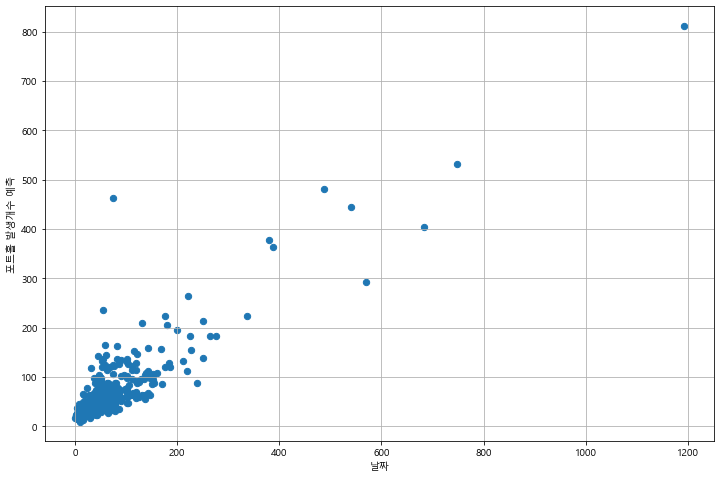

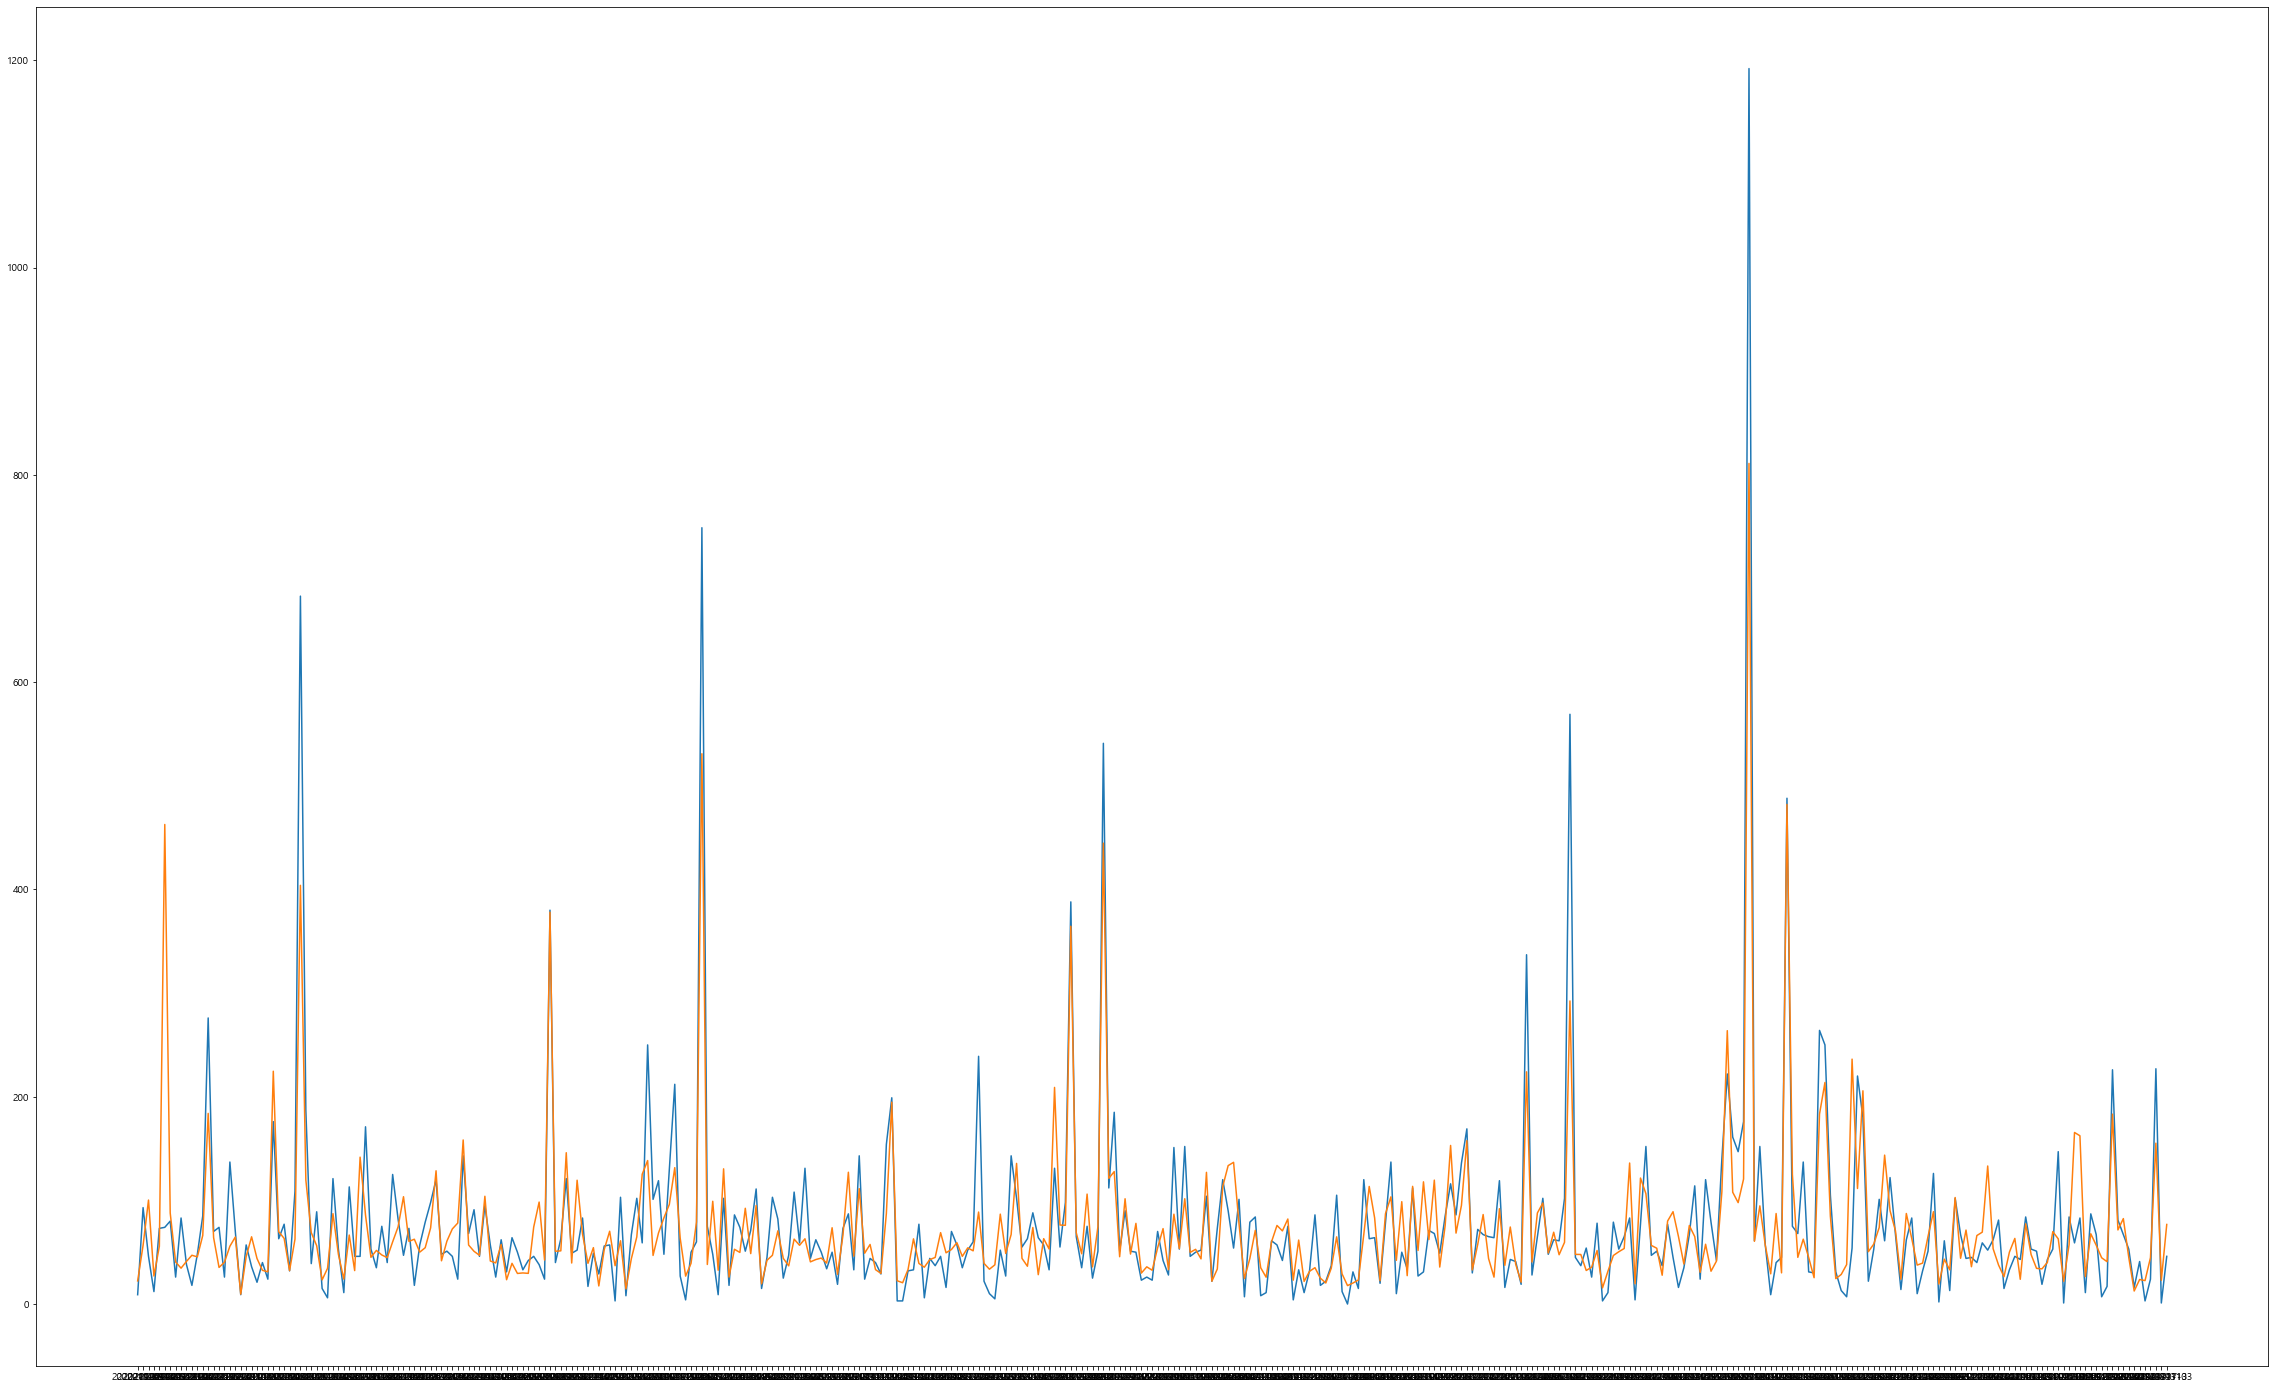

                                 OLS Regression Results                                
Dep. Variable:                   발생건수   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.817
Method:                 Least Squares   F-statistic:                              698.1
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                        0.00
Time:                        23:26:48   Log-Likelihood:                         -6634.0
No. Observations:                1247   AIC:                                  1.328e+04
Df Residuals:                    1239   BIC:                                  1.332e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\LeeSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


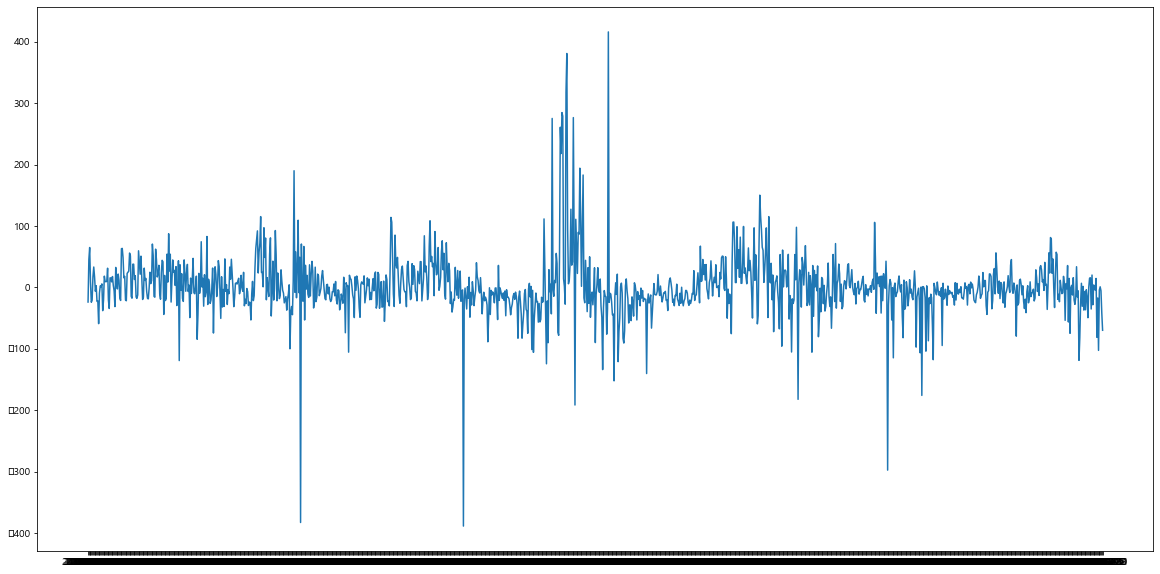

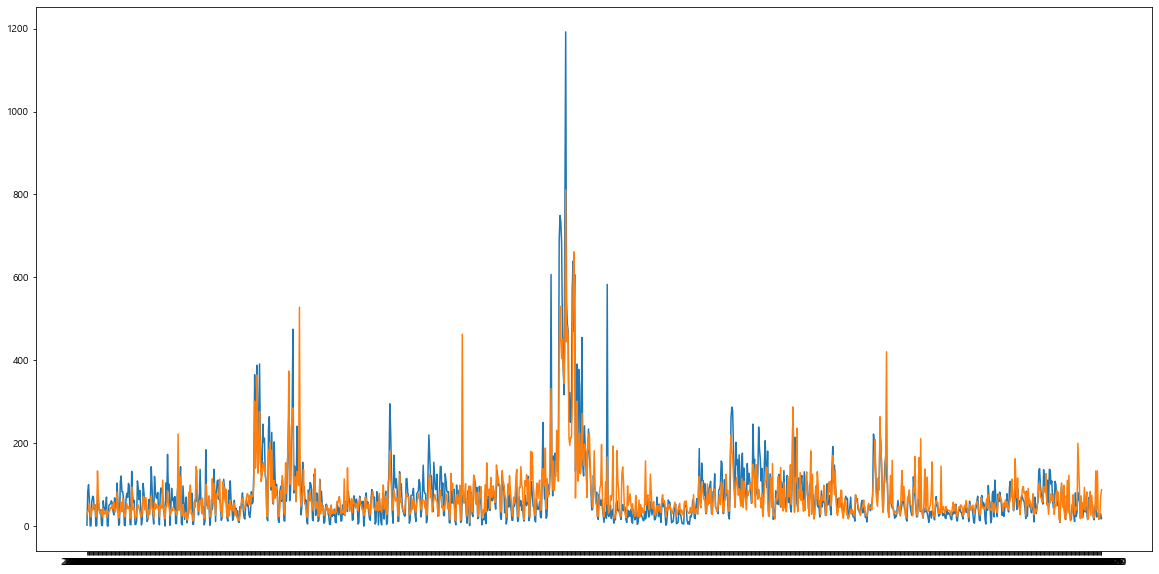

In [15]:
porthall("강남구")

In [16]:
def porthall_scaled(gu):
    
    city = pd.read_csv('기상데이터/개정 날씨데이터/{}_포트홀_날씨.csv'.format(gu))
    city.index = city['Date']
    city.drop('Date', axis=1,inplace=True)
    
    # 다중선형회귀 시작 전 minmaxscaler 적용
    city_scaled = scaler.fit_transform(city)
    city_scaled = pd.DataFrame(city_scaled)
    city_scaled.columns = city.columns
    city_scaled.index = city.index
    
    # 다중선형회귀 시작
    X = city_scaled.drop(['발생건수'],axis=1)
    y = city_scaled['발생건수']
    
    # 훈련, 검증 셋으로 분할
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lr=LinearRegression() # 선형회귀모델 가져오기
    # 적합
    lr.fit(X_train,y_train)
    
    # 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
    y_pred=lr.predict(X_test)
    # 평가 지표 계산
    eval_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    # 수정된 결정 계수 확인(Ajusted-R2)
    #데이터의 크기
    n=len(X_train)

    #독립변수의 갯수
    k=len(X_train.columns)

    # 수정된 결정 계수
    adj_r2=1-((1-r2)*(n-1)/(n-k-1))

    print('Adjusted R2 : {:.4f}'.format(adj_r2))
    
    # ndarray의 실수를 부동 소수점으로 출력
    np.set_printoptions(suppress=True)
    # 회귀 계수와 절편 값 확인

    print('y절편 : {:.3f}'.format(lr.intercept_))
    print('회귀 계수 : ',np.round(lr.coef_,3))
    # ndarray의 실수 출력 옵션 복구
    np.set_printoptions(suppress=False)

    #회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 시리즈 자료형으로 만들고,
    coef=pd.Series(data=np.round(lr.coef_,3),index=X.columns)
    #회귀 계수값을 기준으로 내림차순으로 정렬
    coef_sort = coef.sort_values(ascending=False)

    #회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
    #시리즈 자료형으로 만듦
    print('y = '+str(lr.intercept_) + ' +  ' )
    # 식이 어떻게 구성되는지 확인
    for i,c in zip(coef.index,coef.values):
        print('(' + str(c) + ') * ' + str(i) + " + ")


    # 그래프로 시각화
    plt.figure(figsize=(12,8))
    plt.scatter(y_test,y_pred,s=40) # s : 점의 크기
    # plt.plot([5,50],[5,50],c='r',ls='--') # 실제값=예측값일때
    plt.xlabel('날짜')
    plt.ylabel('포트홀 발생개수 예측')
    plt.grid()
    plt.show()


    # 실제, 예측 비교
    plt.figure(figsize=(40,25))

    plt.plot(y_test, label='y_test')
    plt.plot(y_pred, label='y_pred')
    plt.show()


    # 칼럼 분석 자료
    import statsmodels.api as sm

    x2 = X.values
    model = sm.OLS(y,x2)
    result = model.fit()
    sm.add_constant(x2)
    print(result.summary())
    
    
    city_scaled['예측수치'] = city_scaled['강수량']*lr.coef_[0] + city_scaled['강설량']*lr.coef_[1] + city_scaled['최고기온']*lr.coef_[2] \
+ city_scaled['최저기온']*lr.coef_[3] + city_scaled['습도']*lr.coef_[4] + city_scaled['강수형태']*lr.coef_[5] + city_scaled['강수확률']*lr.coef_[6]\
+ city_scaled['파손면적합계']*lr.coef_[7] + city_scaled['일교차']*lr.coef_[8] + lr.intercept_
        
        
    city_scaled['차이'] = city_scaled['발생건수'] - city_scaled['예측수치']
    plt.figure(figsize=(20,10))
    plt.plot(city_scaled['차이'])
    
    plt.figure(figsize=(20,10))
    plt.plot(city_scaled['발생건수'])
    plt.plot(city_scaled['예측수치'])

MSE :  0.002
RMSE :  0.043
R2 :  0.751
Adjusted R2 : 0.7485
y절편 : 555460935515.600
회귀 계수 :  [ 1.11000000e-01 -4.00000000e-03  2.04409624e+12 -1.91078562e+12
  1.60000000e-02 -2.70000000e-02  2.80000000e-02  6.34000000e-01
 -1.13314031e+12]
y = 555460935515.6 +  
(0.111) * 강수량 + 
(-0.004) * 강설량 + 
(2044096242697.308) * 최고기온 + 
(-1910785618173.583) * 최저기온 + 
(0.016) * 습도 + 
(-0.027) * 강수형태 + 
(0.028) * 강수확률 + 
(0.634) * 파손면적합계 + 
(-1133140308451.788) * 일교차 + 


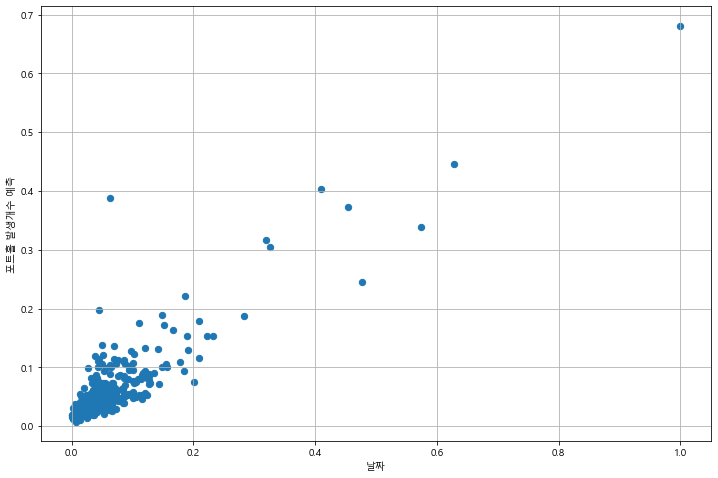

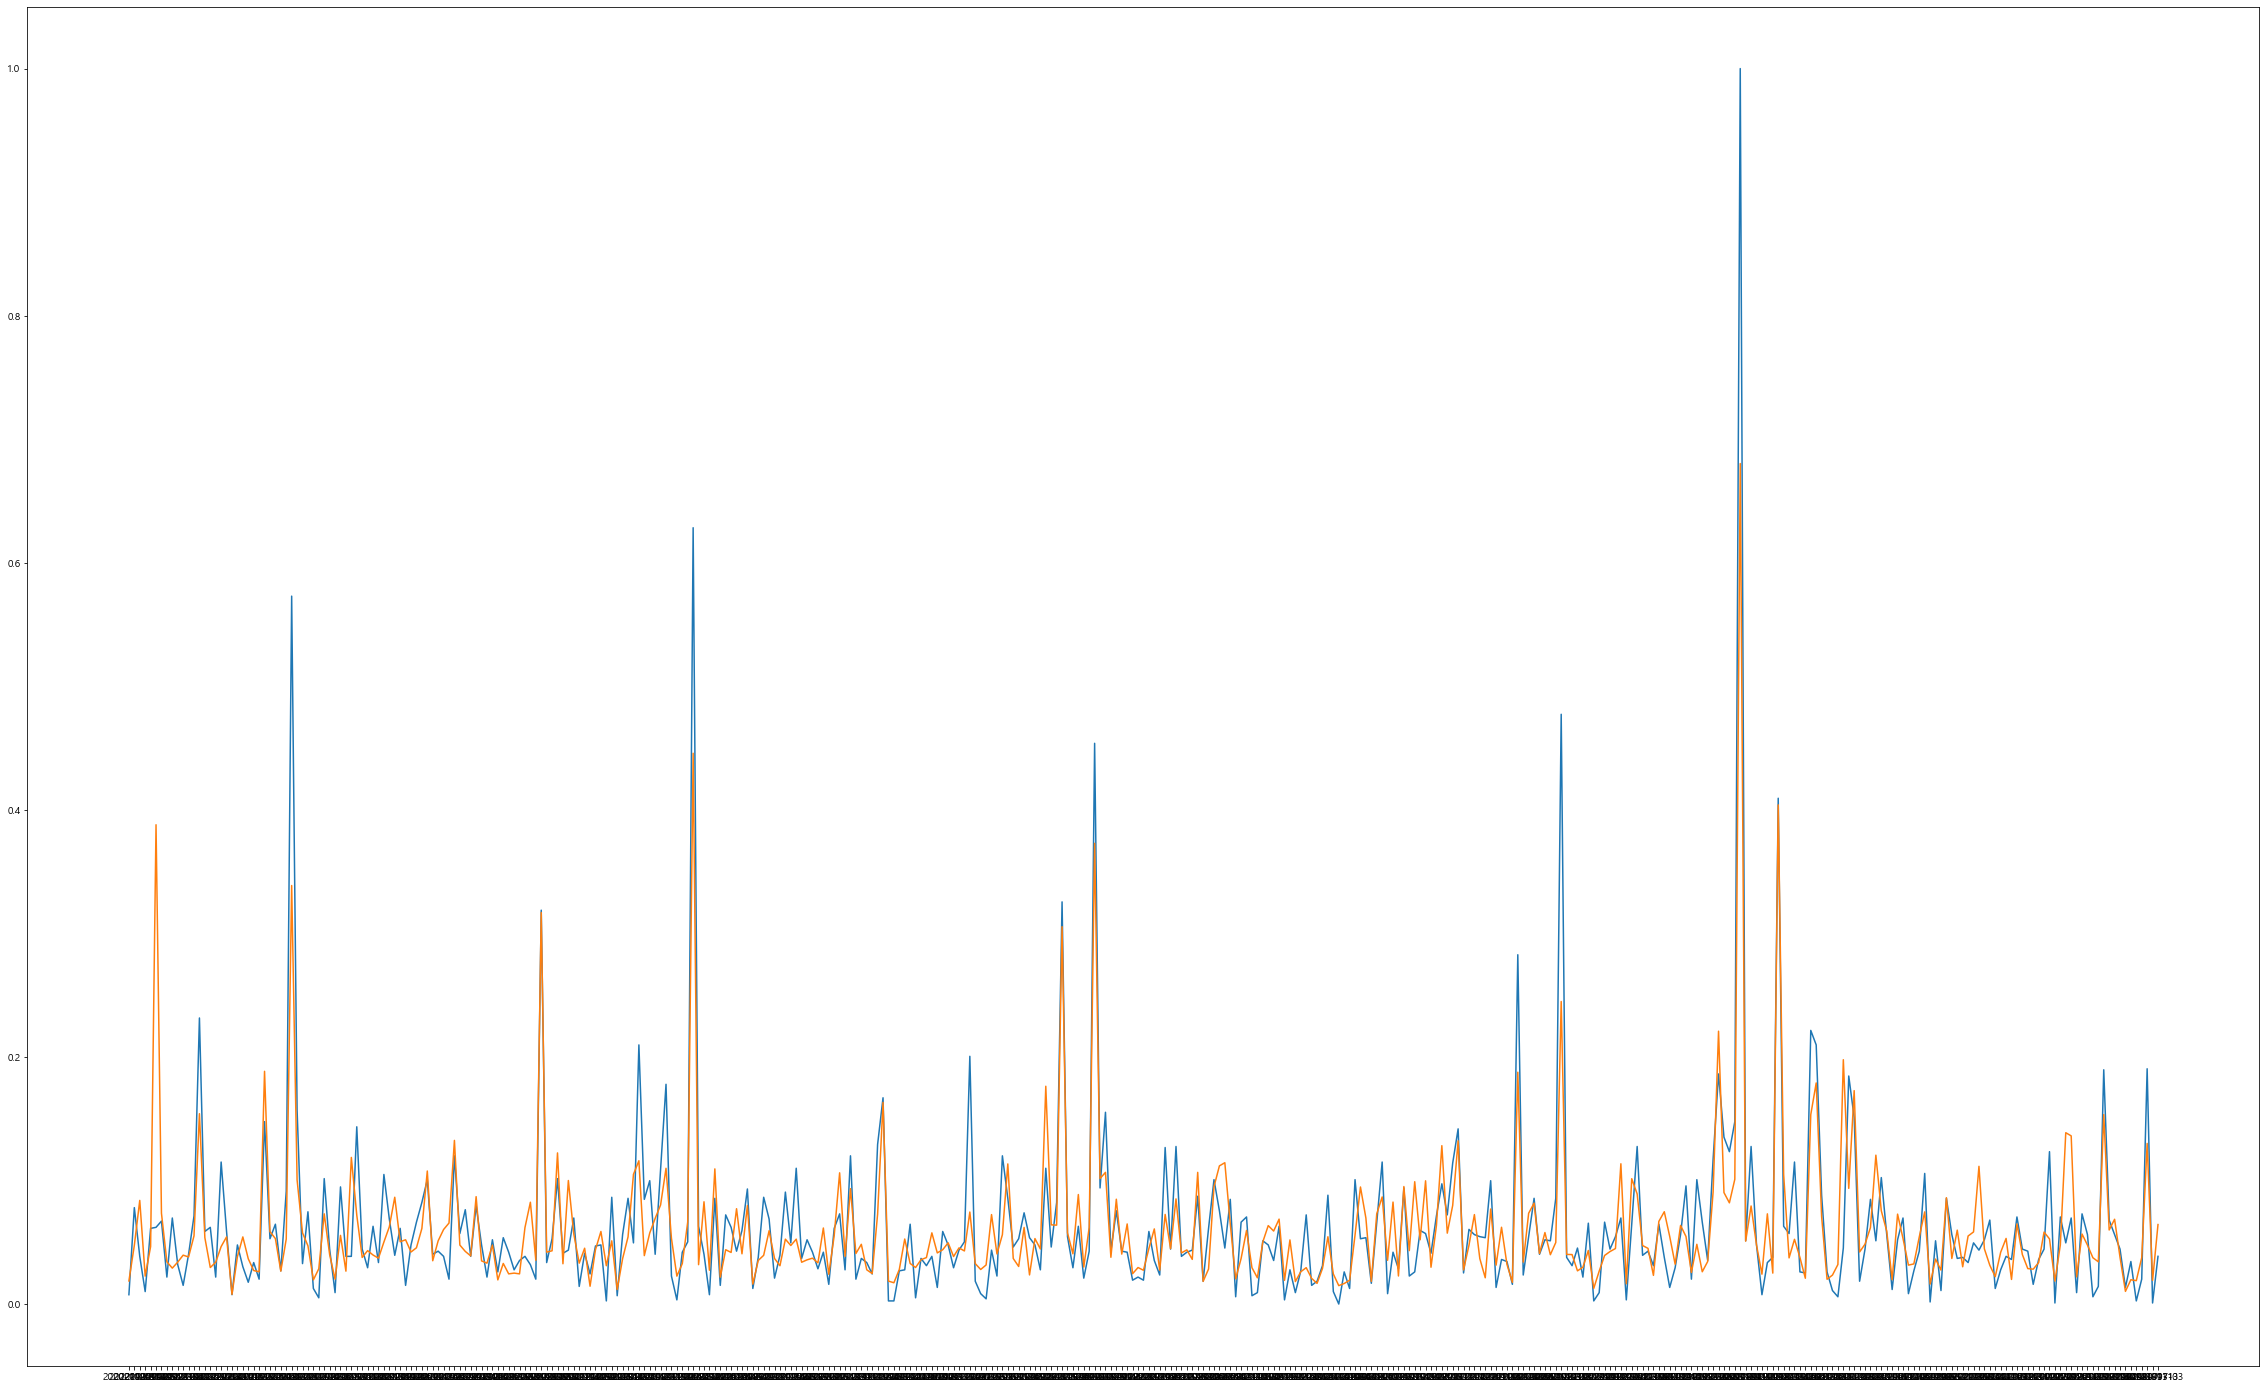

                            OLS Regression Results                            
Dep. Variable:                   발생건수   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     347.6
Date:                Tue, 01 Nov 2022   Prob (F-statistic):          4.04e-310
Time:                        23:31:29   Log-Likelihood:                 2203.0
No. Observations:                1247   AIC:                            -4388.
Df Residuals:                    1238   BIC:                            -4342.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1257      0.019      6.776      0.0

C:\Users\LeeSH\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


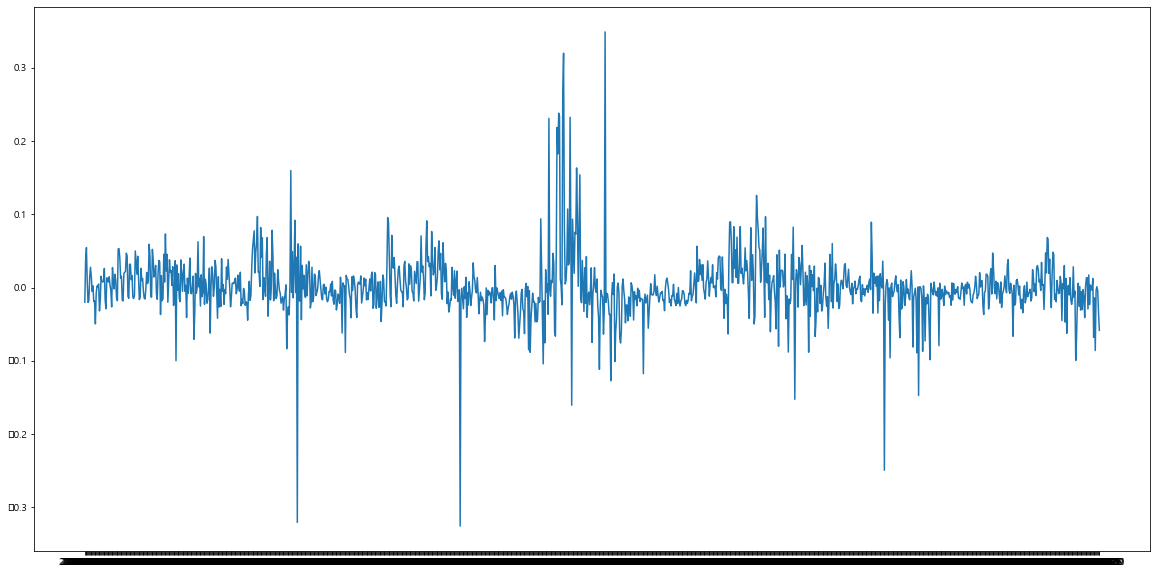

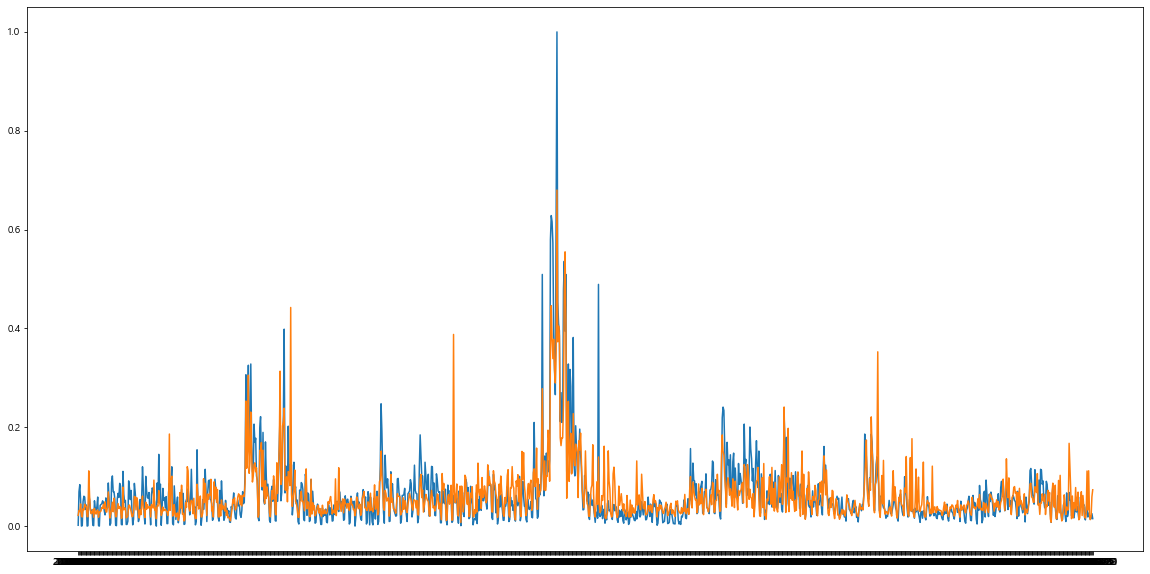

In [17]:
porthall_scaled("강남구")